In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize']=(10,5)
#pd.set_option('display.max_rows',None)#To see all the rows

In [2]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
test_df_1=test_df.copy()

In [4]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
train_df.set_index('PassengerId',inplace=True)
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [6]:
#extract prefix from name 
import pandas as pd
import numpy as np

# Assuming you have already loaded your dataframe as train_df
train_df['Prefix'] = train_df['Name'].str.extract('([A-Za-z]+)\.', expand=False)

# Display the first few rows to check the extracted prefixes
print(train_df[['Name', 'Prefix']].head())

                                                          Name Prefix
PassengerId                                                          
1                                      Braund, Mr. Owen Harris     Mr
2            Cumings, Mrs. John Bradley (Florence Briggs Th...    Mrs
3                                       Heikkinen, Miss. Laina   Miss
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)    Mrs
5                                     Allen, Mr. William Henry     Mr


In [7]:
# Calculate the median Age for each Prefix, excluding missing values
median_ages = train_df.groupby('Prefix')['Age'].median()

# Display the median ages
print(median_ages)

Prefix
Capt        70.0
Col         58.0
Countess    33.0
Don         40.0
Dr          46.5
Jonkheer    38.0
Lady        48.0
Major       48.5
Master       3.5
Miss        21.0
Mlle        24.0
Mme         24.0
Mr          30.0
Mrs         35.0
Ms          28.0
Rev         46.5
Sir         49.0
Name: Age, dtype: float64


In [8]:
# Create a function to fill missing Age values with the median for each prefix
def fill_age(row, median_ages):
    if pd.isnull(row['Age']):
        return median_ages[row['Prefix']]
    else:
        return row['Age']

# Apply the function to fill missing Age values
train_df['Age'] = train_df.apply(lambda row: fill_age(row, median_ages), axis=1)

# Display the first few rows to check the filled Age values
print(train_df[['Name', 'Prefix', 'Age']].head())

                                                          Name Prefix   Age
PassengerId                                                                
1                                      Braund, Mr. Owen Harris     Mr  22.0
2            Cumings, Mrs. John Bradley (Florence Briggs Th...    Mrs  38.0
3                                       Heikkinen, Miss. Laina   Miss  26.0
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)    Mrs  35.0
5                                     Allen, Mr. William Henry     Mr  35.0


In [9]:
train_df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
Prefix        0
dtype: int64

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
 11  Prefix    891 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 90.5+ KB


In [11]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.390202,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.265322,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
train_df.isna().sum() 

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
Prefix        0
dtype: int64

#age has 177 missing values have to fill them with nan, cabin has 687 missing values we dont need cabin numbers have to remove them and lastly embarked has 2 missing values

In [13]:
train_df.duplicated().sum() #no duplicates

0

<Axes: ylabel='PassengerId'>

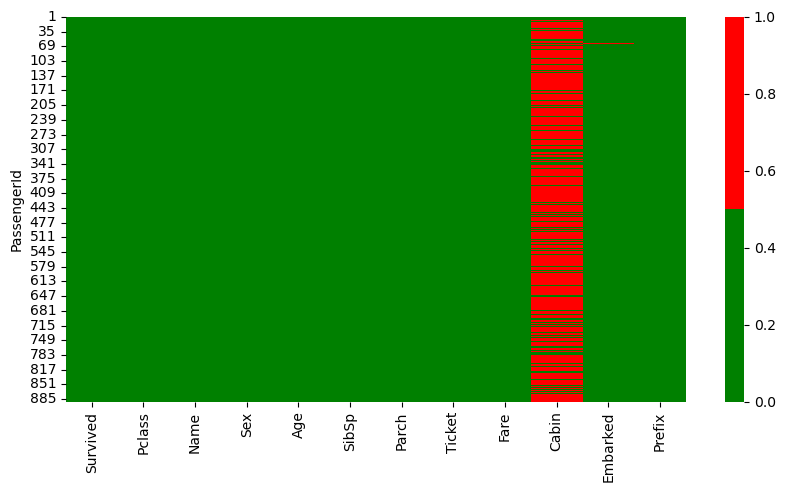

In [14]:
sns.heatmap(train_df.isna(),cmap=['green','red'])

In [15]:
#percentage of missing values
for i in train_df.isna().sum():
    print((i/len(train_df))*100)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
77.10437710437711
0.22446689113355783
0.0


In [16]:
#sns.pairplot(train_df)

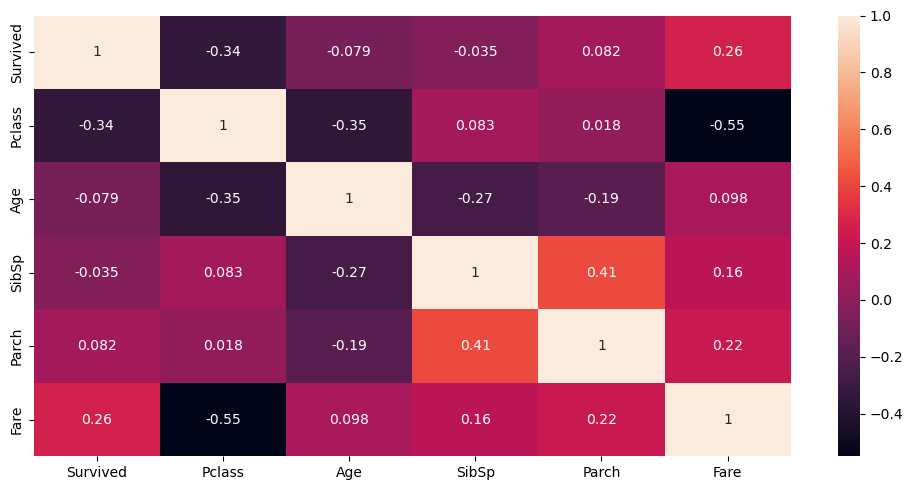

In [17]:
sns.heatmap(train_df.corr(numeric_only=True),annot=True)
plt.tight_layout()

In [18]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [19]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [20]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [21]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [22]:
train_df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
Prefix       object
dtype: object

In [23]:
train_df.drop(columns=['Cabin','Ticket','Name','Prefix'],inplace=True)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S
889,0,3,female,21.0,1,2,23.4500,S


In [24]:
# train_df['Age'].fillna(train_df['Age'].median(),inplace=True)
# train_df.isna().sum()

In [25]:
train_df['Embarked'].isna()

PassengerId
1      False
2      False
3      False
4      False
5      False
       ...  
887    False
888    False
889    False
890    False
891    False
Name: Embarked, Length: 891, dtype: bool

In [26]:
train_df.dropna(inplace=True)
train_df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [27]:
train_df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [28]:
train_df=pd.get_dummies(data=train_df,columns=['Embarked','Sex'])
train_df

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
PassengerId,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,0,1,0,1
2,1,1,38.0,1,0,71.2833,1,0,0,1,0
3,1,3,26.0,0,0,7.9250,0,0,1,1,0
4,1,1,35.0,1,0,53.1000,0,0,1,1,0
5,0,3,35.0,0,0,8.0500,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000,0,0,1,0,1
888,1,1,19.0,0,0,30.0000,0,0,1,1,0
889,0,3,21.0,1,2,23.4500,0,0,1,1,0


<Axes: >

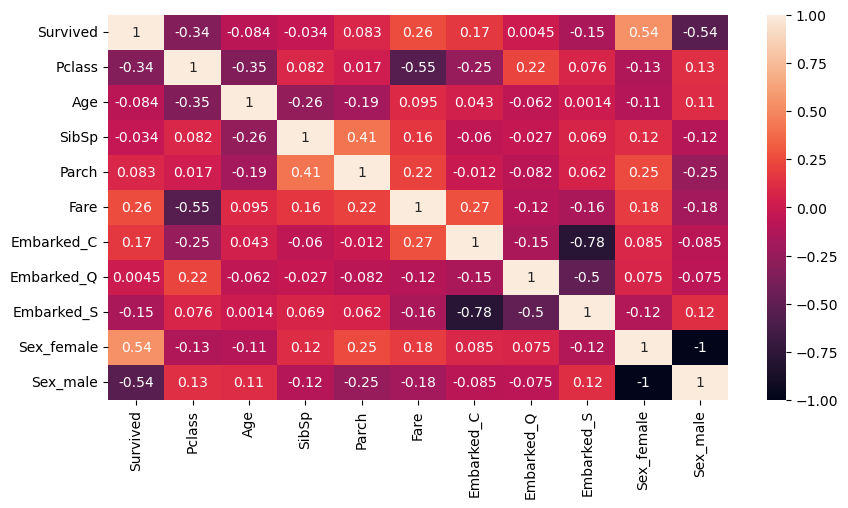

In [29]:
sns.heatmap(train_df.corr(),annot=True)

<Axes: >

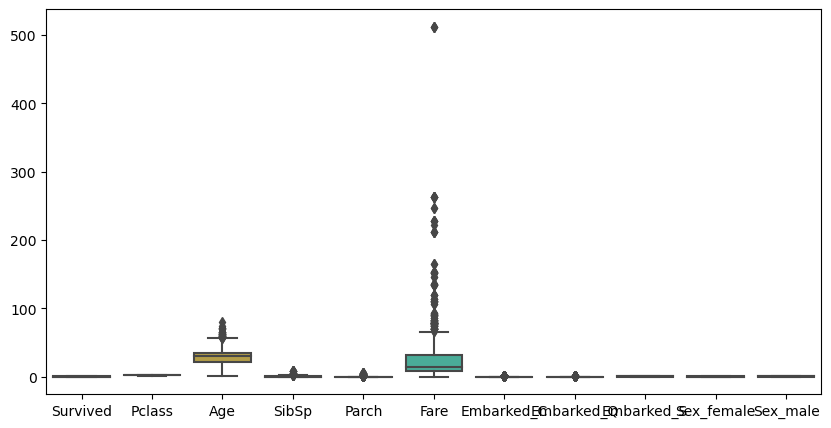

In [30]:
sns.boxplot(train_df)

In [31]:
train_df.dtypes

Survived        int64
Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
Sex_female      uint8
Sex_male        uint8
dtype: object

In [32]:
train_df['Age'].isnull().sum()

0

<Axes: xlabel='Age'>

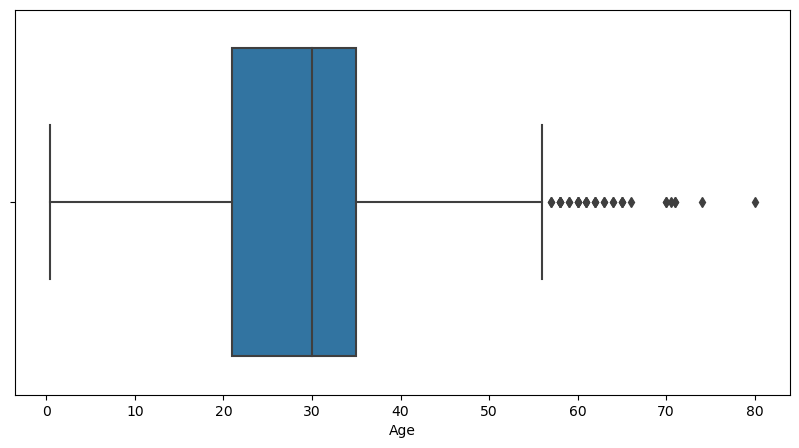

In [33]:
sns.boxplot(x=train_df['Age'])

<Axes: xlabel='Age', ylabel='Count'>

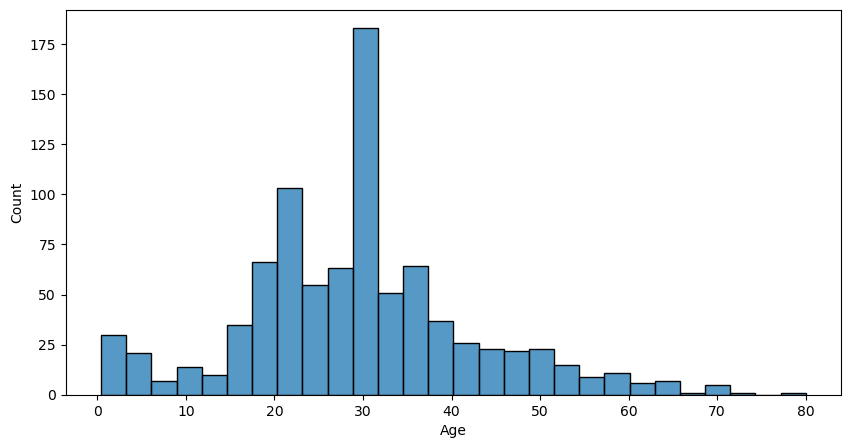

In [34]:
sns.histplot(train_df['Age'])

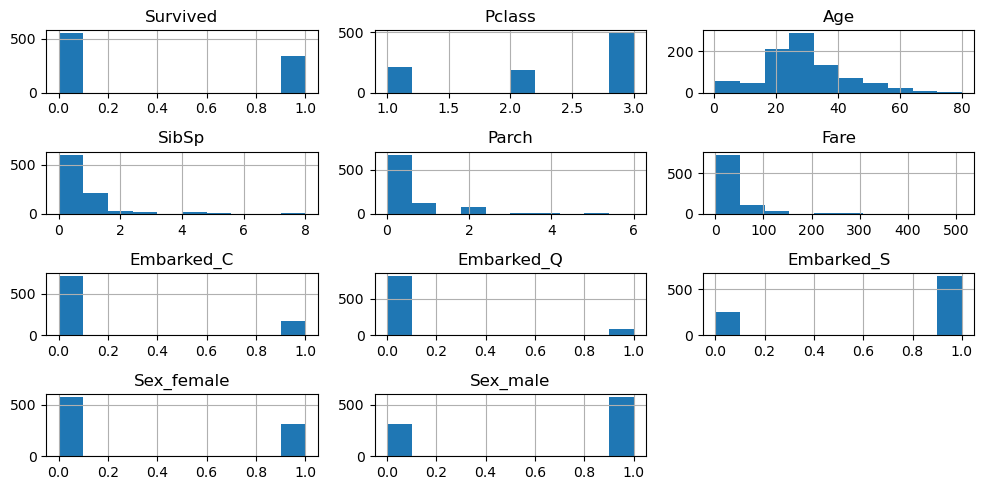

In [35]:
train_df.hist()
plt.tight_layout()

In [36]:
# Calculate the z-score 
z = np.abs(stats.zscore(train_df['Age']))

# Identify outliers with a z-score greater than 3
threshold = 3
outliers = train_df[z > threshold]
outliers

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
PassengerId,,,,,,,,,,,
97,0,1,71.0,0,0,34.6542,1,0,0,0,1
117,0,3,70.5,0,0,7.7500,0,1,0,0,1
494,0,1,71.0,0,0,49.5042,1,0,0,0,1
631,1,1,80.0,0,0,30.0000,0,0,1,0,1
673,0,2,70.0,0,0,10.5000,0,0,1,0,1
746,0,1,70.0,1,1,71.0000,0,0,1,0,1
852,0,3,74.0,0,0,7.7750,0,0,1,0,1


<Axes: xlabel='Age'>

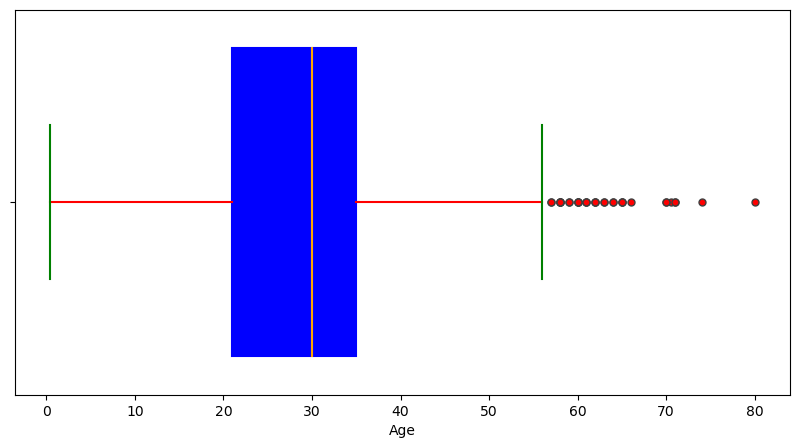

In [37]:
sns.boxplot(data=train_df, x='Age',
            boxprops=dict(color='blue'), 
            whiskerprops=dict(color='red'), 
            capprops=dict(color='green'), 
            medianprops=dict(color='orange'), 
            flierprops=dict(markerfacecolor='red', marker='o'))

In [38]:
# calculate IQR 
Q1 = train_df['Age'].quantile(0.25)
Q3 = train_df['Age'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers = train_df[(train_df['Age'] < Q1 - threshold * IQR) | (train_df['Age'] > Q3 + threshold * IQR)]
outliers

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
PassengerId,,,,,,,,,,,
12,1,1,58.0,0,0,26.5500,0,0,1,1,0
34,0,2,66.0,0,0,10.5000,0,0,1,0,1
55,0,1,65.0,0,1,61.9792,1,0,0,0,1
95,0,3,59.0,0,0,7.2500,0,0,1,0,1
97,0,1,71.0,0,0,34.6542,1,0,0,0,1
117,0,3,70.5,0,0,7.7500,0,1,0,0,1
171,0,1,61.0,0,0,33.5000,0,0,1,0,1
196,1,1,58.0,0,0,146.5208,1,0,0,1,0
233,0,2,59.0,0,0,13.5000,0,0,1,0,1


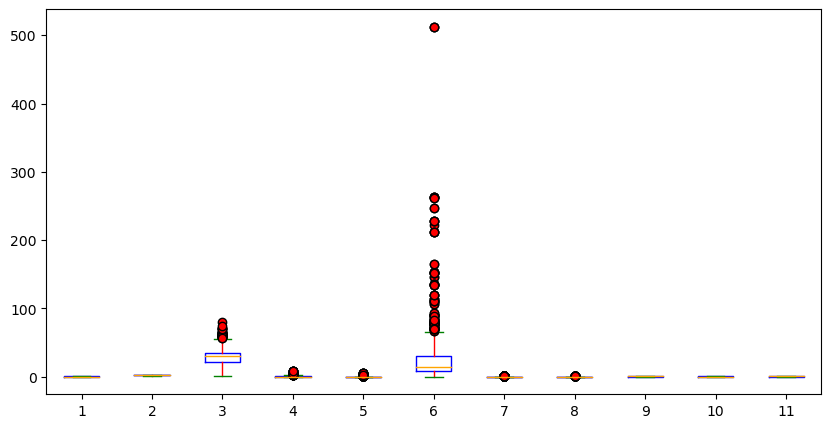

In [39]:
plt.boxplot(train_df, boxprops=dict(color='blue'), whiskerprops=dict(color='red'), capprops=dict(color='green'), medianprops=dict(color='orange'), flierprops=dict(markerfacecolor='red', marker='o'))
plt.show()

<Axes: >

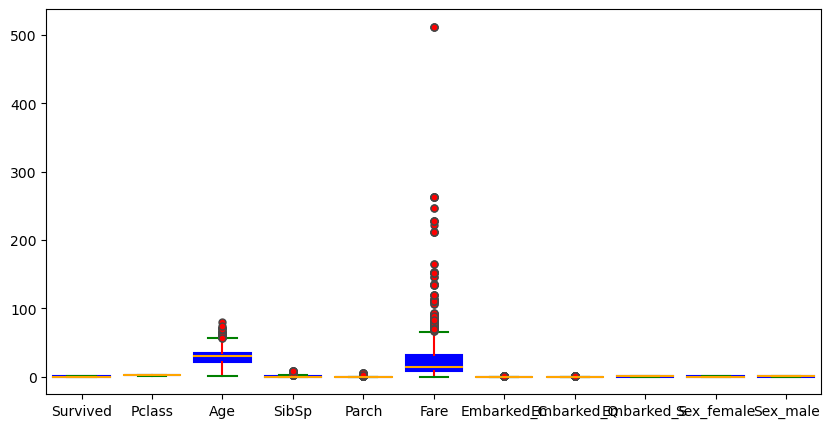

In [40]:
sns.boxplot(data=train_df, 
            boxprops=dict(color='blue'), 
            whiskerprops=dict(color='red'), 
            capprops=dict(color='green'), 
            medianprops=dict(color='orange'), 
            flierprops=dict(markerfacecolor='red', marker='o'))

In [41]:
train_df.dtypes

Survived        int64
Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
Sex_female      uint8
Sex_male        uint8
dtype: object

<Axes: xlabel='SibSp'>

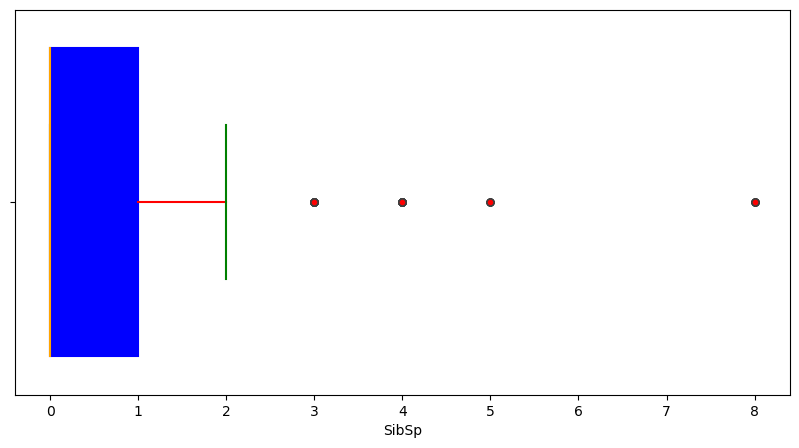

In [42]:
sns.boxplot(data=train_df, x='SibSp',
            boxprops=dict(color='blue'), 
            whiskerprops=dict(color='red'), 
            capprops=dict(color='green'), 
            medianprops=dict(color='orange'), 
            flierprops=dict(markerfacecolor='red', marker='o'))

Number of outliers: 46


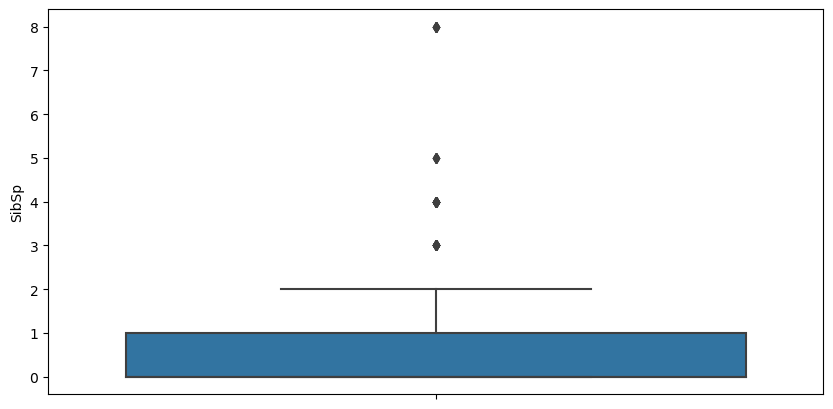

In [43]:
import numpy as np
import pandas as pd

# Assuming train_df is your DataFrame and 'SibSp' is the column you are analyzing

# Calculate IQR
Q1 = train_df['SibSp'].quantile(0.25)
Q3 = train_df['SibSp'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
threshold = 1.5
outliers = train_df[(train_df['SibSp'] < Q1 - threshold * IQR) | (train_df['SibSp'] > Q3 + threshold * IQR)]
print(f"Number of outliers: {len(outliers)}")

# Visualize with a boxplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=train_df, y='SibSp')
plt.show()


In [44]:
# Calculate the z-score 
z = np.abs(stats.zscore(train_df['SibSp']))

# Identify outliers with a z-score greater than 3
threshold = 3
outliers = train_df[z > threshold]
outliers

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
PassengerId,,,,,,,,,,,
17,0,3,2.0,4,1,29.1250,0,1,0,0,1
51,0,3,7.0,4,1,39.6875,0,0,1,0,1
60,0,3,11.0,5,2,46.9000,0,0,1,0,1
69,1,3,17.0,4,2,7.9250,0,0,1,1,0
72,0,3,16.0,5,2,46.9000,0,0,1,1,0
120,0,3,2.0,4,2,31.2750,0,0,1,1,0
160,0,3,3.5,8,2,69.5500,0,0,1,0,1
165,0,3,1.0,4,1,39.6875,0,0,1,0,1
172,0,3,4.0,4,1,29.1250,0,1,0,0,1


In [45]:
# calculate IQR 
Q1 = train_df['SibSp'].quantile(0.25)
Q3 = train_df['SibSp'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers = train_df[(train_df['SibSp'] < Q1 - threshold * IQR) | (train_df['SibSp'] > Q3 + threshold * IQR)]
outliers

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
PassengerId,,,,,,,,,,,
8,0,3,2.0,3,1,21.0750,0,0,1,0,1
17,0,3,2.0,4,1,29.1250,0,1,0,0,1
25,0,3,8.0,3,1,21.0750,0,0,1,1,0
28,0,1,19.0,3,2,263.0000,0,0,1,0,1
51,0,3,7.0,4,1,39.6875,0,0,1,0,1
60,0,3,11.0,5,2,46.9000,0,0,1,0,1
64,0,3,4.0,3,2,27.9000,0,0,1,0,1
69,1,3,17.0,4,2,7.9250,0,0,1,1,0
72,0,3,16.0,5,2,46.9000,0,0,1,1,0


<Axes: xlabel='Parch'>

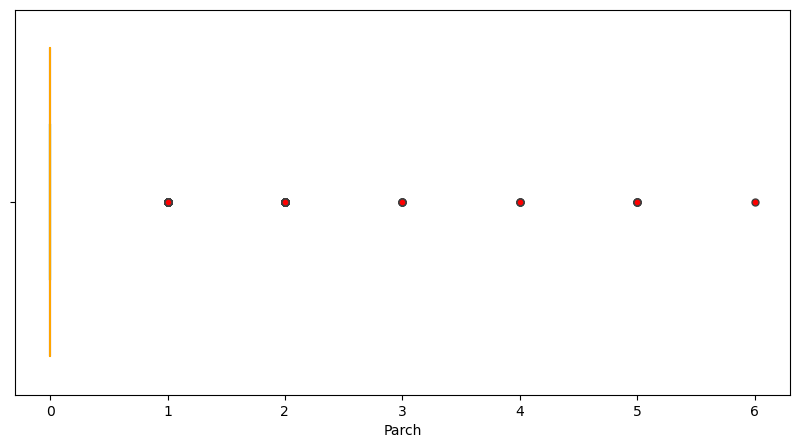

In [46]:
sns.boxplot(data=train_df, x='Parch',
            boxprops=dict(color='blue'), 
            whiskerprops=dict(color='red'), 
            capprops=dict(color='green'), 
            medianprops=dict(color='orange'), 
            flierprops=dict(markerfacecolor='red', marker='o'))

In [47]:
# calculate IQR 
Q1 = train_df['Parch'].quantile(0.25)
Q3 = train_df['Parch'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers = train_df[(train_df['Parch'] < Q1 - threshold * IQR) | (train_df['Parch'] > Q3 + threshold * IQR)]
outliers
print(f"Number of outliers: {len(outliers)}")
outliers

Number of outliers: 213


,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
PassengerId,,,,,,,,,,,
8,0,3,2.0,3,1,21.0750,0,0,1,0,1
9,1,3,27.0,0,2,11.1333,0,0,1,1,0
11,1,3,4.0,1,1,16.7000,0,0,1,1,0
14,0,3,39.0,1,5,31.2750,0,0,1,0,1
17,0,3,2.0,4,1,29.1250,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
872,1,1,47.0,1,1,52.5542,0,0,1,1,0
880,1,1,56.0,0,1,83.1583,1,0,0,1,0
881,1,2,25.0,0,1,26.0000,0,0,1,1,0


<Axes: xlabel='Fare'>

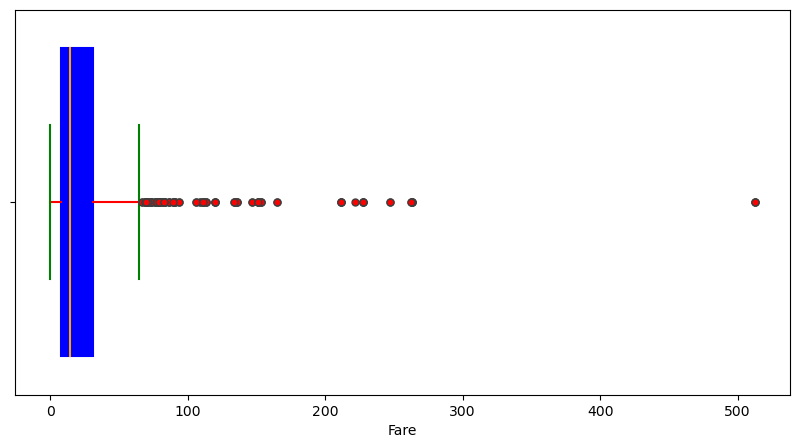

In [48]:
sns.boxplot(data=train_df, x='Fare',
            boxprops=dict(color='blue'), 
            whiskerprops=dict(color='red'), 
            capprops=dict(color='green'), 
            medianprops=dict(color='orange'), 
            flierprops=dict(markerfacecolor='red', marker='o'))

In [49]:
# calculate IQR 
Q1 = train_df['Fare'].quantile(0.25)
Q3 = train_df['Fare'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers = train_df[(train_df['Fare'] < Q1 - threshold * IQR) | (train_df['Fare'] > Q3 + threshold * IQR)]
outliers

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
PassengerId,,,,,,,,,,,
2,1,1,38.0,1,0,71.2833,1,0,0,1,0
28,0,1,19.0,3,2,263.0000,0,0,1,0,1
32,1,1,35.0,1,0,146.5208,1,0,0,1,0
35,0,1,28.0,1,0,82.1708,1,0,0,0,1
53,1,1,49.0,1,0,76.7292,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
847,0,3,30.0,8,2,69.5500,0,0,1,0,1
850,1,1,35.0,1,0,89.1042,1,0,0,1,0
857,1,1,45.0,1,1,164.8667,0,0,1,1,0


In [50]:
train_df.isna().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Sex_female    0
Sex_male      0
dtype: int64

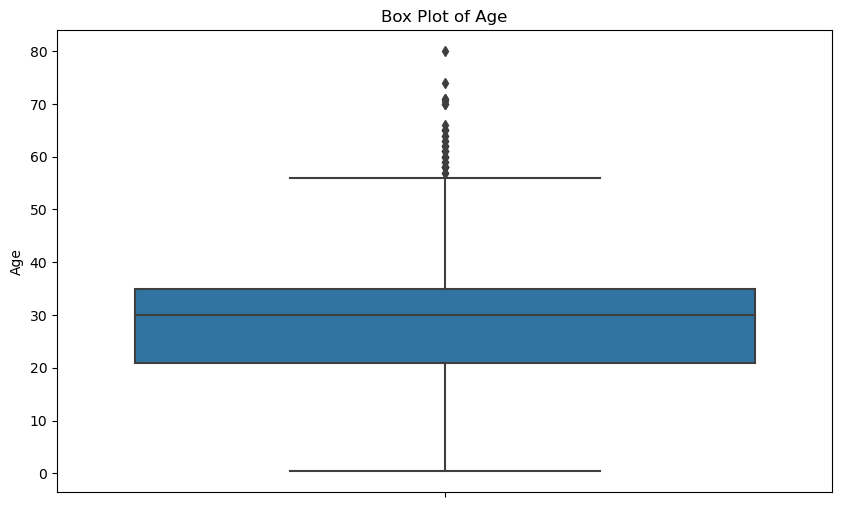

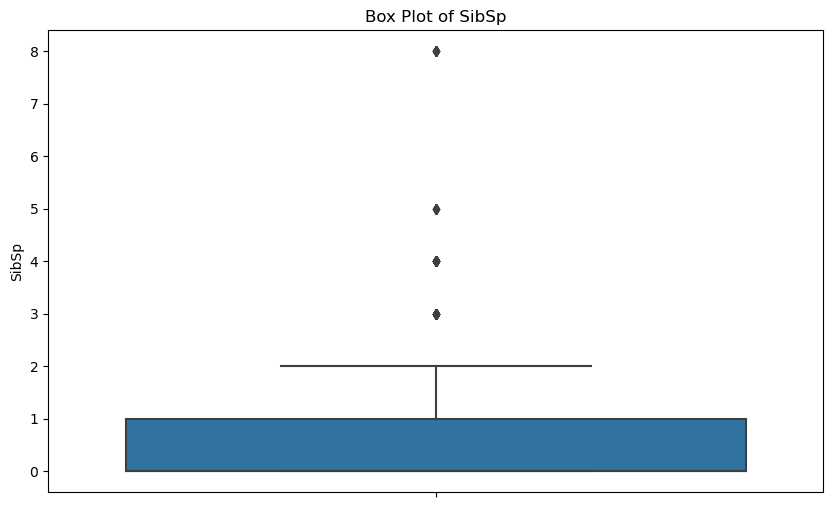

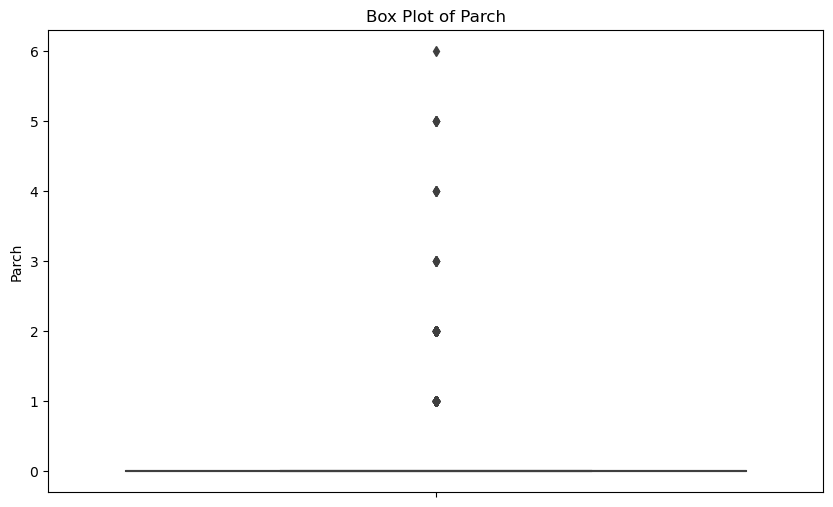

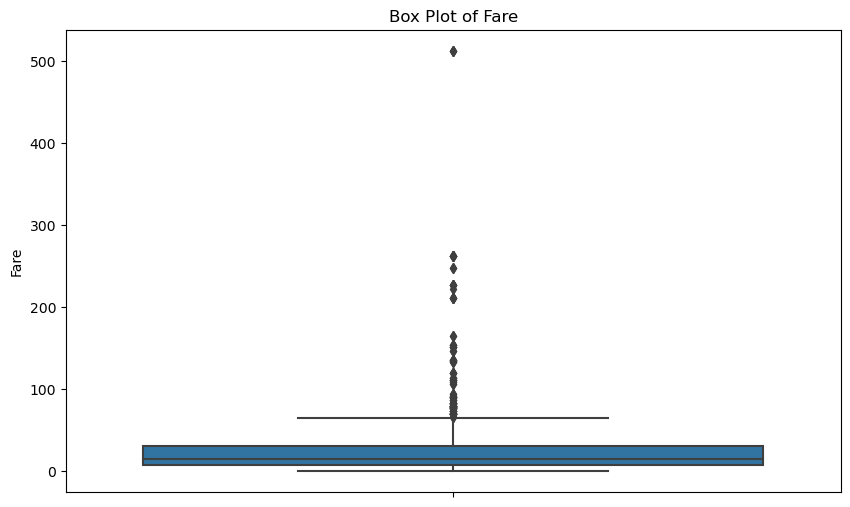

(567, 11)


In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the dataset
data = train_df.copy()

# Define features to visualize
features = ['Age', 'SibSp', 'Parch', 'Fare']

# Visualize each feature
for col in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, y=col)
    plt.title(f'Box Plot of {col}')
    plt.show()

# IQR method to remove outliers
for col in features:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

# Verify the changes
print(data.shape)


In [52]:
train_df.dtypes

Survived        int64
Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
Sex_female      uint8
Sex_male        uint8
dtype: object

In [53]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [54]:
test_df.set_index('PassengerId',inplace=True)

In [55]:
import pandas as pd
import numpy as np

# Assuming you have already loaded your dataframe as train_df
test_df['Prefix'] = test_df['Name'].str.extract('([A-Za-z]+)\.', expand=False)

# Display the first few rows to check the extracted prefixes
print(test_df[['Name', 'Prefix']].head())


                                                     Name Prefix
PassengerId                                                     
892                                      Kelly, Mr. James     Mr
893                      Wilkes, Mrs. James (Ellen Needs)    Mrs
894                             Myles, Mr. Thomas Francis     Mr
895                                      Wirz, Mr. Albert     Mr
896          Hirvonen, Mrs. Alexander (Helga E Lindqvist)    Mrs


In [56]:
# Apply the function to fill missing Age values
test_df['Age'] = test_df.apply(lambda row: fill_age(row, median_ages), axis=1)

# Display the first few rows to check the filled Age values
print(test_df[['Name', 'Prefix', 'Age']].head())


                                                     Name Prefix   Age
PassengerId                                                           
892                                      Kelly, Mr. James     Mr  34.5
893                      Wilkes, Mrs. James (Ellen Needs)    Mrs  47.0
894                             Myles, Mr. Thomas Francis     Mr  62.0
895                                      Wirz, Mr. Albert     Mr  27.0
896          Hirvonen, Mrs. Alexander (Helga E Lindqvist)    Mrs  22.0


In [57]:
test_df.isna().sum()

Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
Prefix        0
dtype: int64

In [58]:
test_df[test_df['Fare'].isna()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
PassengerId,,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Mr


In [59]:
test_df.drop(columns=['Cabin','Name','Ticket','Prefix'],inplace=True)
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,34.5,0,0,7.8292,Q
893,3,female,47.0,1,0,7.0000,S
894,2,male,62.0,0,0,9.6875,Q
895,3,male,27.0,0,0,8.6625,S
896,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
1305,3,male,30.0,0,0,8.0500,S
1306,1,female,39.0,0,0,108.9000,C
1307,3,male,38.5,0,0,7.2500,S


In [60]:
test_df=pd.get_dummies(data=test_df,columns=['Embarked','Sex'])
test_df

,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
PassengerId,,,,,,,,,,
892,3,34.5,0,0,7.8292,0,1,0,0,1
893,3,47.0,1,0,7.0000,0,0,1,1,0
894,2,62.0,0,0,9.6875,0,1,0,0,1
895,3,27.0,0,0,8.6625,0,0,1,0,1
896,3,22.0,1,1,12.2875,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
1305,3,30.0,0,0,8.0500,0,0,1,0,1
1306,1,39.0,0,0,108.9000,1,0,0,1,0
1307,3,38.5,0,0,7.2500,0,0,1,0,1


In [61]:
test_df.isna().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          1
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Sex_female    0
Sex_male      0
dtype: int64

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

# Load your train_df and test_df here
# train_df = pd.read_csv('path/to/train.csv')
# test_df = pd.read_csv('path/to/test.csv')

# Define features and target for training data
X = train_df.drop(columns=['Survived'])
y = train_df['Survived']

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)



# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest model
clf = RandomForestClassifier(random_state=42)

# Initialize Grid Search with cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit Grid Search to the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Train the model with the best parameters
clf_best = RandomForestClassifier(**best_params, random_state=42)
clf_best.fit(X_train_scaled, y_train)

# Make predictions on the validation set using clf_best
y_val_pred = clf_best.predict(X_val_scaled)

# Evaluate model
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

# Handle missing values in test_df and scale features
imputer = SimpleImputer(strategy='median')
X_test_imputed = imputer.fit_transform(test_df)
X_test_scaled = scaler.transform(X_test_imputed)

# Make predictions on the test set (without actual labels) using clf_best
y_pred = clf_best.predict(X_test_scaled)
print(f'Predictions on test set: {y_pred}')

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Validation Accuracy: 77.53%
Predictions on test set: [0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0
 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 

C:\Users\rites\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [65]:
# Assuming your predictions are stored in an array called 'predictions'
predictions = y_pred  # Replace with your actual predictions

# Create a new DataFrame with the required columns from test_df
results_df = pd.DataFrame({
    'PassengerId': test_df.index,
    'Survived': predictions
})

# Display the first few rows to check the result
print(results_df)

# save the result to a CSV file
results_df.to_csv('submission.csv', index=False)


     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]
